#Import the libraries

In [36]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import RandomOverSampler

import plotly.express as express

#Read the dataset

In [38]:
data = pd.read_csv("MCSDatasetNEXTCONLab.csv")

In [39]:
data

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14479,3999,45.445303,-75.165596,2,1,18,20,20,10,80,0,131397,1
14480,3999,45.445574,-75.165168,2,1,28,20,10,10,80,0,131397,1
14481,4000,45.436682,-75.152416,0,12,21,30,30,4,63,0,122015,1
14482,4000,45.436978,-75.153278,0,12,31,30,20,4,63,0,122015,1


#Splitting to features and label

In [40]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [41]:
x

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784
...,...,...,...,...,...,...,...,...,...,...,...,...
14479,3999,45.445303,-75.165596,2,1,18,20,20,10,80,0,131397
14480,3999,45.445574,-75.165168,2,1,28,20,10,10,80,0,131397
14481,4000,45.436682,-75.152416,0,12,21,30,30,4,63,0,122015
14482,4000,45.436978,-75.153278,0,12,31,30,20,4,63,0,122015


In [42]:
y

,Ligitimacy
0,1
1,1
2,1
3,1
4,1
...,...
14479,1
14480,1
14481,1
14482,1


#Oversampling the fake tasks class

In [43]:
ov = RandomOverSampler(sampling_strategy= 'minority')
X_res, y_res = ov.fit_resample(x, y)

In [44]:
X_res

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784
...,...,...,...,...,...,...,...,...,...,...,...,...
25169,2633,45.550732,-75.187319,4,11,31,50,30,10,91,0,309691
25170,1836,45.567417,-75.231940,1,8,56,50,20,1,56,1,347221
25171,2327,45.406017,-75.236216,5,11,2,40,40,10,30,0,65701
25172,1755,45.461136,-75.147407,0,12,36,60,50,7,76,0,159552


#Train test split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, train_size = 0.8)

In [46]:
x_train

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
14717,3706,45.406574,-75.234980,0,16,0,60,60,8,53,0,65701
11932,3310,45.409624,-75.221576,2,3,29,40,30,6,44,0,75086
10063,2799,45.434667,-75.241940,1,2,40,60,30,4,47,0,112620
8106,2255,45.435958,-75.272037,0,19,20,40,10,3,79,0,112616
14417,3982,45.473836,-75.180982,2,5,38,50,20,7,63,0,178315
...,...,...,...,...,...,...,...,...,...,...,...,...
12297,3420,45.491785,-75.204770,5,10,32,60,20,3,95,1,215848
8570,2388,45.551339,-75.189458,0,12,13,20,20,10,68,0,319074
23516,2892,45.469613,-75.156274,3,17,1,40,10,6,63,0,178319
9722,2706,45.508950,-75.207398,0,12,34,40,30,10,77,0,244000


#Apply models

##Random Forest

In [47]:
RF_model = RandomForestClassifier(random_state=42)
RF_model = RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)
y_pred_train_RF = RF_model.predict(x_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [48]:
y_pred_RF

array([1, 0, 0, ..., 0, 0, 0])


Classification Report:

               precision    recall  f1-score   support

      Class 0       1.00      1.00      1.00      2567
legit Class 1       1.00      1.00      1.00      2468

     accuracy                           1.00      5035
    macro avg       1.00      1.00      1.00      5035
 weighted avg       1.00      1.00      1.00      5035


Confusion Matrix:

[[2567    0]
 [   2 2466]]

Accuracy Score:

0.9996027805362463
\Confusion Matrix Display:



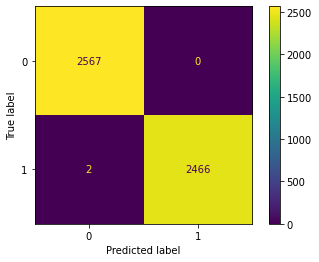

In [49]:
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred_RF, target_names = ["Class 0", "legit Class 1"]))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(y_test, y_pred_RF)
print(cm)
print('\nAccuracy Score:\n')
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print(RF_accuracy)
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

##Adaboost 

In [50]:
AD_model  = AdaBoostClassifier(n_estimators=100, random_state=42)
AD_model = AD_model.fit(x_train, y_train)
y_pred_AB = AD_model.predict(x_test)
y_pred_train_AD = AD_model.predict(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [51]:
y_pred_AB

array([1, 0, 0, ..., 0, 0, 0])


Classification Report:

               precision    recall  f1-score   support

      Class 0       0.95      0.99      0.97      2567
legit Class 1       0.99      0.95      0.97      2468

     accuracy                           0.97      5035
    macro avg       0.97      0.97      0.97      5035
 weighted avg       0.97      0.97      0.97      5035


Confusion Matrix:

[[2549   18]
 [ 128 2340]]

Accuracy Score:

0.9710029791459781
\Confusion Matrix Display:



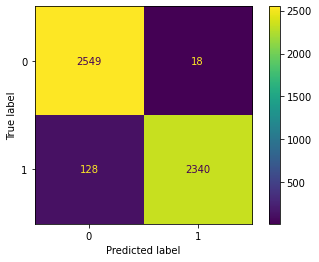

In [52]:
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred_AB, target_names = ["Class 0", "legit Class 1"]))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(y_test, y_pred_AB)
print(cm)
print('\nAccuracy Score:\n')
AD_accuracy = accuracy_score(y_test, y_pred_AB)
print(AD_accuracy)
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

##Naive Bayes

In [53]:
NB_model = GaussianNB()
NB_model = NB_model.fit(x_train, y_train)
y_pred_NB = NB_model.predict(x_test)
y_pred_train_NB = NB_model.predict(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [54]:
y_pred_NB

array([0, 0, 0, ..., 1, 1, 0])


Classification Report:

               precision    recall  f1-score   support

      Class 0       0.69      0.86      0.77      2567
legit Class 1       0.81      0.60      0.69      2468

     accuracy                           0.74      5035
    macro avg       0.75      0.73      0.73      5035
 weighted avg       0.75      0.74      0.73      5035


Confusion Matrix:

[[2212  355]
 [ 976 1492]]

Accuracy Score:

0.7356504468718967
\Confusion Matrix Display:



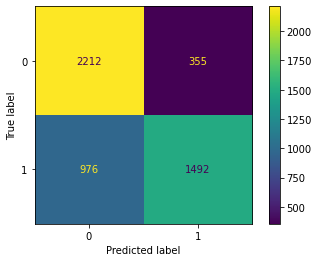

In [55]:
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred_NB, target_names = ["Class 0", "legit Class 1"]))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(y_test, y_pred_NB)
print(cm)
print('\nAccuracy Score:\n')
NB_accuracy = accuracy_score(y_test, y_pred_NB)
print(NB_accuracy)
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

#Voting Majority

In [56]:
# y_pred_RF
# y_pred_AB
# y_pred_NB

In [57]:
y_majority = []

for i in range(len(y_pred_RF)):
  if (y_pred_RF[i] + y_pred_AB[i] + y_pred_NB[i]) >= 2:
    y_majority.append(1)
  else:
    y_majority.append(0)

len(y_majority)

5035

In [58]:
print('\nClassification Report:\n')
print(classification_report(y_test, y_majority, target_names = ["Class 0", "legit Class 1"]))
print('\nAccuracy Score:\n')
majority_accuracy = accuracy_score(y_test, y_majority)
print(majority_accuracy)


Classification Report:

               precision    recall  f1-score   support

      Class 0       0.96      0.99      0.98      2567
legit Class 1       0.99      0.96      0.98      2468

     accuracy                           0.98      5035
    macro avg       0.98      0.98      0.98      5035
 weighted avg       0.98      0.98      0.98      5035


Accuracy Score:

0.9781529294935452


#Weighted sum

##Training accuracy

In [59]:
x = accuracy_score(y_train, y_pred_train_RF)
y = accuracy_score(y_train, y_pred_train_AD)
z = accuracy_score(y_train, y_pred_train_NB)
sum = x + y + z

##Weights

In [60]:
w_RF = x / sum
w_AD = y / sum
w_NB = z / sum

In [61]:
P_RF = y_pred_RF
P_AB = y_pred_AB
P_NB = y_pred_NB

#Aggregated output

In [62]:
Agg_out = (P_RF * w_RF) + (P_AB * w_AD) + (P_NB * w_NB)

In [63]:
Agg_out

array([0.73128631, 0.        , 0.        , ..., 0.26871369, 0.26871369,
       0.        ])

In [64]:
Agg_binary = []

for i in range(len(Agg_out)):
  if Agg_out[i] > 0.5:
    Agg_binary.append(1)
  else:
    Agg_binary.append(0)

len(Agg_binary)

5035

In [65]:
print('\nClassification Report:\n')
print(classification_report(y_test, Agg_binary, target_names = ["Class 0", "legit Class 1"]))
print('\nAccuracy Score:\n')
agg_accuracy = accuracy_score(y_test, Agg_binary)
print(agg_accuracy)


Classification Report:

               precision    recall  f1-score   support

      Class 0       0.96      0.99      0.98      2567
legit Class 1       0.99      0.96      0.98      2468

     accuracy                           0.98      5035
    macro avg       0.98      0.98      0.98      5035
 weighted avg       0.98      0.98      0.98      5035


Accuracy Score:

0.9781529294935452


#Majority and weighted sum comparison

In [66]:
print('\nClassification Report:\n')
print(classification_report(y_majority, Agg_binary, target_names = ["Class 0", "legit Class 1"]))
print('\nAccuracy Score:\n')
print(accuracy_score(y_majority, Agg_binary))


Classification Report:

               precision    recall  f1-score   support

      Class 0       1.00      1.00      1.00      2649
legit Class 1       1.00      1.00      1.00      2386

     accuracy                           1.00      5035
    macro avg       1.00      1.00      1.00      5035
 weighted avg       1.00      1.00      1.00      5035


Accuracy Score:

1.0


#Plot 

In [67]:
values = [RF_accuracy, AD_accuracy, NB_accuracy, majority_accuracy, agg_accuracy]
axis_x = ['RF', 'Adaboost', 'NB','Ensemble-vote','Enseble-weighted']
fig=express.bar(x=axis_x, y=values, title="Accuracy Comparison", labels=dict(x="Models", y="Accuracy"))
fig.update_yaxes(tick0=0.5, dtick=0.05)
fig.update_yaxes(showgrid=False)
fig.show()